In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install --upgrade matplotlib
!pip install --upgrade yfinance
!pip install --upgrade datetime

     ---------------------------------------- 55.9/55.9 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4


In [1]:
# importing some libs
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [2]:
# Importing the dataset from yahoo
start = datetime(2019, 1, 1)
today = datetime.now()
    
yf.pdr_override()
spy = pdr.data.get_data_yahoo('ETH-USD', start=start, end=today)

spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01 00:00:00+00:00,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02 00:00:00+00:00,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03 00:00:00+00:00,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04 00:00:00+00:00,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05 00:00:00+00:00,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...
2023-03-01 00:00:00+00:00,1606.040405,1663.433716,1601.548584,1663.433716,1663.433716,7701847224
2023-03-02 00:00:00+00:00,1663.549072,1672.051147,1622.599976,1647.319336,1647.319336,7080950926
2023-03-03 00:00:00+00:00,1647.557739,1648.475342,1552.451538,1569.167603,1569.167603,9922240199


In [3]:
spy_c = spy['Close']
spy_c.tail(20)

Date
2023-02-14 00:00:00+00:00    1556.875122
2023-02-15 00:00:00+00:00    1673.745972
2023-02-16 00:00:00+00:00    1640.067627
2023-02-17 00:00:00+00:00    1694.783325
2023-02-18 00:00:00+00:00    1691.819458
2023-02-19 00:00:00+00:00    1681.436157
2023-02-20 00:00:00+00:00    1702.675171
2023-02-21 00:00:00+00:00    1658.036377
2023-02-22 00:00:00+00:00    1643.231689
2023-02-23 00:00:00+00:00    1651.073853
2023-02-24 00:00:00+00:00    1608.373169
2023-02-25 00:00:00+00:00    1594.914917
2023-02-26 00:00:00+00:00    1640.817139
2023-02-27 00:00:00+00:00    1634.326416
2023-02-28 00:00:00+00:00    1605.895142
2023-03-01 00:00:00+00:00    1663.433716
2023-03-02 00:00:00+00:00    1647.319336
2023-03-03 00:00:00+00:00    1569.167603
2023-03-04 00:00:00+00:00    1566.923950
2023-03-05 00:00:00+00:00    1564.468750
Name: Close, dtype: float64

Text(0.5, 0, 'Date')

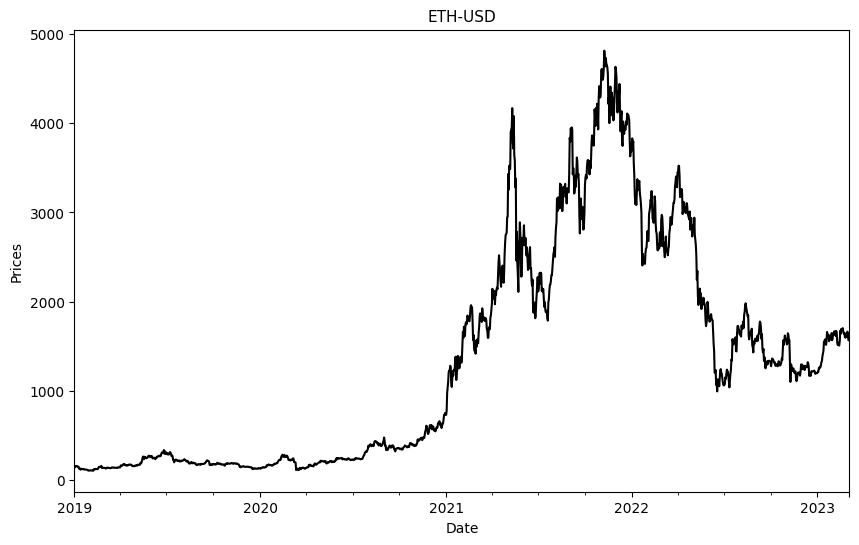

In [6]:
# Creating a graphical representation for spy_c
fig, ax = plt.subplots(figsize=(10, 6))

spy_c.plot(color='k')

plt.title('ETH-USD', fontsize=11)
plt.ylabel('Prices')
plt.xlabel('Date')

In [8]:
# Creating columns to see days before.
for i in range(1, 20, 1):
    spy.loc[:, 'Minus-' + str(i)] = round(spy['Close'].shift(i), 2)
    sp = spy[[x for x in spy.columns if 'Minus-' in x or x == 'Close' or x == 'Open']].iloc[19:,]

sp

,Open,Close,Minus-1,Minus-2,Minus-3,Minus-4,Minus-5,Minus-6,Minus-7,Minus-8,...,Minus-10,Minus-11,Minus-12,Minus-13,Minus-14,Minus-15,Minus-16,Minus-17,Minus-18,Minus-19
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-20 00:00:00+00:00,124.632401,119.474831,124.52,121.01,123.74,123.55,122.03,129.07,116.90,125.97,...,128.63,150.80,150.36,151.70,157.75,155.64,154.58,149.14,155.05,140.82
2019-01-21 00:00:00+00:00,119.636459,117.157852,119.47,124.52,121.01,123.74,123.55,122.03,129.07,116.90,...,127.55,128.63,150.80,150.36,151.70,157.75,155.64,154.58,149.14,155.05
2019-01-22 00:00:00+00:00,117.110756,118.747551,117.16,119.47,124.52,121.01,123.74,123.55,122.03,129.07,...,125.97,127.55,128.63,150.80,150.36,151.70,157.75,155.64,154.58,149.14
2019-01-23 00:00:00+00:00,118.713814,117.452606,118.75,117.16,119.47,124.52,121.01,123.74,123.55,122.03,...,116.90,125.97,127.55,128.63,150.80,150.36,151.70,157.75,155.64,154.58
2019-01-24 00:00:00+00:00,117.462784,117.362885,117.45,118.75,117.16,119.47,124.52,121.01,123.74,123.55,...,129.07,116.90,125.97,127.55,128.63,150.80,150.36,151.70,157.75,155.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01 00:00:00+00:00,1606.040405,1663.433716,1605.90,1634.33,1640.82,1594.91,1608.37,1651.07,1643.23,1658.04,...,1681.44,1691.82,1694.78,1640.07,1673.75,1556.88,1507.17,1515.03,1539.93,1514.87
2023-03-02 00:00:00+00:00,1663.549072,1647.319336,1663.43,1605.90,1634.33,1640.82,1594.91,1608.37,1651.07,1643.23,...,1702.68,1681.44,1691.82,1694.78,1640.07,1673.75,1556.88,1507.17,1515.03,1539.93
2023-03-03 00:00:00+00:00,1647.557739,1569.167603,1647.32,1663.43,1605.90,1634.33,1640.82,1594.91,1608.37,1651.07,...,1658.04,1702.68,1681.44,1691.82,1694.78,1640.07,1673.75,1556.88,1507.17,1515.03


In [9]:
sp = sp.iloc[:,::-1]

sp.tail(1)

,Minus-19,Minus-18,Minus-17,Minus-16,Minus-15,Minus-14,Minus-13,Minus-12,Minus-11,Minus-10,...,Minus-8,Minus-7,Minus-6,Minus-5,Minus-4,Minus-3,Minus-2,Minus-1,Close,Open
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-05 00:00:00+00:00,1556.88,1673.75,1640.07,1694.78,1691.82,1681.44,1702.68,1658.04,1643.23,1651.07,...,1594.91,1640.82,1634.33,1605.9,1663.43,1647.32,1569.17,1566.92,1564.46875,1567.179321


In [10]:
from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

In [11]:
# Creating variables for train and test
x_train = sp[:-100]

y_train = sp['Close'].shift(-1)[:-100]

x_test = sp[-100:]

y_test = sp['Close'].shift(-1)[-100:]

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1406, 21)
(100, 21)
(1406,)
(100,)


In [13]:
# Creating a model 
model = svm.SVR(kernel='linear', verbose=1)

In [12]:
# Training model
model.fit(x_train, y_train)

[LibSVM]

SVR(kernel='linear', verbose=1)

In [13]:
# Predictions
preds = model.predict(x_test)

In [14]:
df = pd.DataFrame(list(zip(y_test, preds)), columns=['Next_day_Close', 'Predicted_Next_Close'], index=y_test.index)

df

,Next day Close,Predicted Next Close
Date,,
2022-10-28 00:00:00+00:00,1619.698486,1576.236861
2022-10-29 00:00:00+00:00,1590.783325,1609.271257
2022-10-30 00:00:00+00:00,1572.714478,1593.289926
2022-10-31 00:00:00+00:00,1579.704590,1601.697988
2022-11-01 00:00:00+00:00,1519.711792,1581.398446
...,...,...
2023-01-31 00:00:00+00:00,1641.792725,1578.792366
2023-02-01 00:00:00+00:00,1643.241577,1635.902631
2023-02-02 00:00:00+00:00,1664.745605,1623.519729
